Task 2 focuses on User Engagement Analysis, which is crucial for understanding how customers interact with applications provided by a telecom service provider. The goal is to assess user engagement levels and identify opportunities for improving the Quality of Service (QoS) to enhance user experience and retention. Here’s a detailed breakdown of Task 2:

Objectives of Task 2:

- Understanding User Engagement: The task aims to analyze user activities on the telecom network to gauge engagement levels across various applications.

- Resource Allocation: By determining user engagement levels, the technical teams can better allocate network resources to different customer clusters based on their engagement scores.

Key Components of User Engagement Analysis:

1. Data Collection:

- Utilize the dataset that contains information about customer activities on various applications such as Social Media, Google, Email, YouTube, Netflix, Gaming, and others.

- This data is typically derived from xDR (data sessions Detail Record) which tracks user behavior.

2. Engagement Metrics:

- Define and compute engagement metrics that may include:

- Total data usage (Download + Upload) per user.

- Frequency of application usage.

- Duration of sessions on each application.

3. Segmentation:

- Segment users based on their engagement levels. This could involve categorizing users into different tiers (e.g., high, medium, low engagement) based on their total data usage or session duration.

4. Analysis Techniques:

- Descriptive Statistics: Calculate mean, median, and other relevant statistics to summarize user engagement.

- Univariate Analysis: Analyze individual variables related to user engagement to understand their distributions and characteristics.

- Bivariate Analysis: Explore relationships between user engagement metrics and other variables (e.g., demographic data, handset types) to identify patterns or correlations.

5. Visualization:

- Create visual representations (charts, graphs) to illustrate user engagement levels and trends over time. This can help in identifying peak usage times and popular applications among different user segments.

6. Interpretation of Results:

- Provide insights based on the analysis. For example, if certain applications show higher engagement, it may indicate where to focus marketing efforts or improve service quality.

- Discuss the implications of user engagement levels on business strategy and resource allocation.

7. Recommendations:

- Based on the findings, make actionable recommendations to improve user engagement. This could involve enhancing the user experience for specific applications, targeting marketing campaigns, or optimizing network resources.

Importance of User Engagement Analysis:

- Customer Retention: Understanding engagement helps in retaining customers by addressing their needs and preferences.

- Service Improvement: Insights from the analysis can guide improvements in service offerings and application performance.

- Business Growth: By identifying high-engagement areas, the telecom provider can focus on profitable segments and enhance overall business performance.

In summary, Task 2 is about analyzing user engagement to inform strategies that enhance customer experience and optimize resource allocation, ultimately contributing to the growth and profitability of the telecom service provider.

## Import modules

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from scripts.data_loader import load_data, load_excel_data
from scripts.db_utils import fetch_data_from_db
from scripts.data_visualization import plot_column_frequency, plot_histograms, plot_graphical_analysis, bivariate_analysis, plot_correlation_matrix, plot_correlation_matrix, analyze_correlation, plot_top_customers
from scripts.analysis import top_10_handsets, top_3_handset_manufacturers, top_5_handsets_per_top_3_manufacturers, aggregate_user_behavior, segment_users_by_decile, calculate_basic_metrics, analyze_opportunities, analyze_dispersion, preprocess_data, apply_pca, calculate_total_traffic, aggregate_metrics, get_top_10_by_metric, print_top_customers
from scripts.sql_query import get_user_data_query

In [4]:
# Define your query
query = "SELECT * FROM xdr_data;"  # Replace with the table or query you want

# Fetch data
data_tel = fetch_data_from_db(query)

# Display the data
if data_tel is not None:
    print(data_tel.head())
else:
    print("Failed to fetch data.")

c:\Users\fikad\Desktop\DESKTOP\10acedamy\Week_2\scripts\db_utils.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [4]:
# Load the dataset
data_tel = load_data(r'C:\Users\fikad\Desktop\DESKTOP\10acedamy\Week_2\Data\Datacleaned_data_tel.csv')
data_tel.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,241538.05,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,241538.05,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


### Analyzing Top Customers from Telecom Dataset


### Dataset Overview
- Each row in the dataset represents a session.
- Columns include:
  - **MSISDN/Number**: Customer identifier.
  - **Dur. (ms)**: Session duration in milliseconds.
  - **Total UL (Bytes)**: Uploaded data in bytes.
  - **Total DL (Bytes)**: Downloaded data in bytes.

Top 10 Customers by Session Duration:
                  Dur. (ms)  Total Traffic (Bytes)  Session Frequency
MSISDN/Number                                                        
3.361368e+10   7.358004e+08           3.686235e+12               7447
3.376820e+10   7.302226e+08           3.677648e+12               7447
3.362578e+10   4.081277e+06           8.449503e+09                 17
3.362632e+10   3.957366e+06           7.958153e+09                 18
3.361489e+10   3.850344e+06           8.787888e+09                 17
3.365973e+10   3.456868e+06           7.710244e+09                 16
3.376054e+10   3.357614e+06           8.553475e+09                 15
3.367588e+10   3.296522e+06           7.890343e+09                 15
3.366716e+10   3.071372e+06           5.661692e+09                 13
3.362708e+10   2.746730e+06           5.754916e+09                 12


Top 10 Customers by Total Traffic:
                  Dur. (ms)  Total Traffic (Bytes)  Session Frequency
MSISDN/Number  

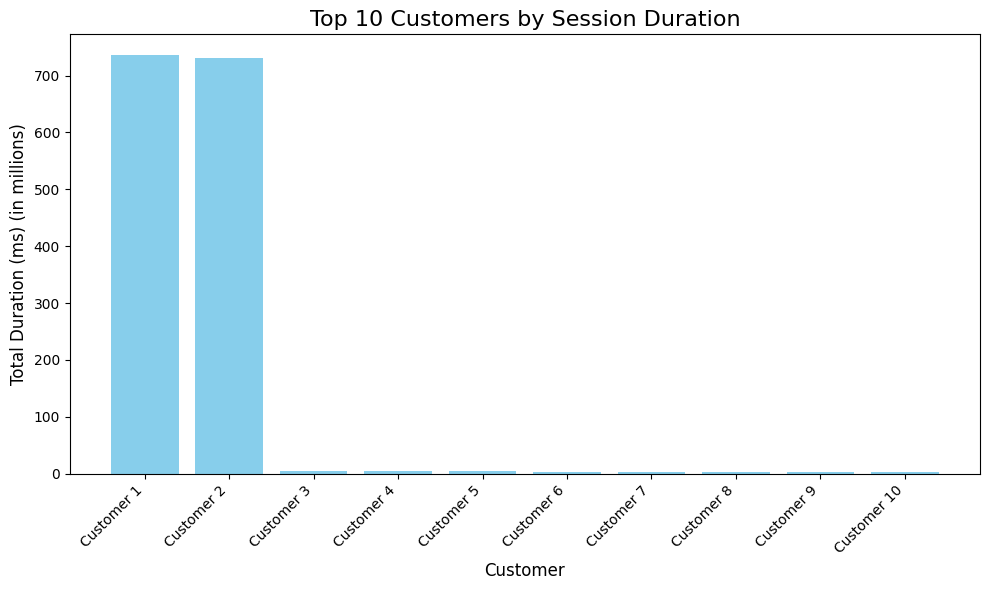

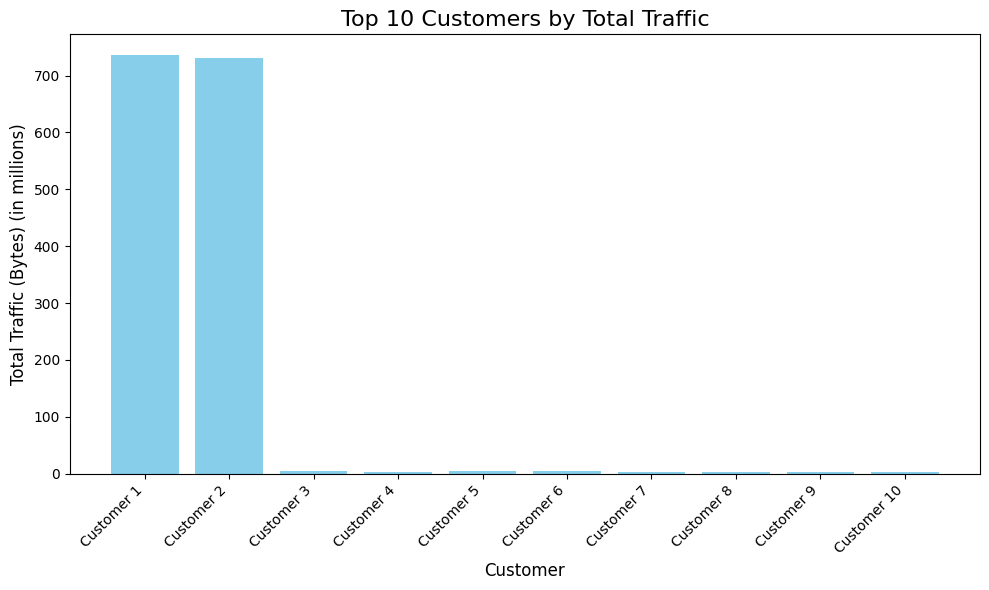

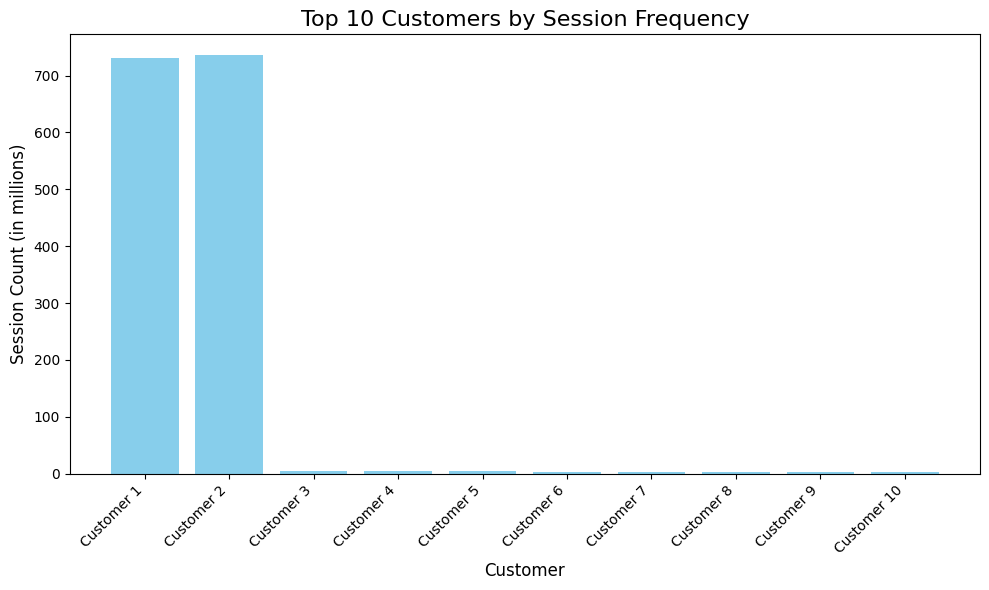

In [9]:

data_tel.columns = data_tel.columns.str.strip()

# Step 1: Calculate total traffic
df = calculate_total_traffic(data_tel)

# Step 2: Aggregate metrics per customer
aggregated = aggregate_metrics(df)

# Step 3: Get top 10 customers for each metric
top_10_duration = get_top_10_by_metric(aggregated, 'Dur. (ms)')
top_10_traffic = get_top_10_by_metric(aggregated, 'Total Traffic (Bytes)')
top_10_frequency = get_top_10_by_metric(aggregated, 'Session Frequency')

# Step 4: Print the results
print_top_customers(top_10_duration, "Session Duration")
print_top_customers(top_10_traffic, "Total Traffic")
print_top_customers(top_10_frequency, "Session Frequency")

# Step 5: Plot the results
plot_top_customers(top_10_duration, "Session Duration", "Total Duration (ms)", save_path="top_duration.png")
plot_top_customers(top_10_traffic, "Total Traffic", "Total Traffic (Bytes)", save_path="top_traffic.png")
plot_top_customers(top_10_frequency, "Session Frequency", "Session Count", save_path="top_frequency.png")